In [2]:
import insightface
import urllib
import urllib.request
import cv2
import numpy as np

def url_to_image(url):
    resp = urllib.request.urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    return image

In [3]:
url = 'https://dujye7n3e5wjl.cloudfront.net/photographs/1080-tall/time-100-influential-photos-ellen-degeneres-oscars-selfie-100.jpg'
img = url_to_image(url)

In [4]:
insightface.model_zoo.get_model_list()

['arcface_r100_v1',
 'genderage_v1',
 'retinaface_mnet025_v1',
 'retinaface_mnet025_v2',
 'retinaface_r50_v1']

In [5]:
model = insightface.app.FaceAnalysis(rec_name = 'arcface_r100_v1', det_name = 'retinaface_mnet025_v2')

In [6]:
ctx_id = 0
model.prepare(ctx_id = ctx_id, nms=0.4)

[32, 16, 8] {'32': {'SCALES': (32, 16), 'BASE_SIZE': 16, 'RATIOS': (1.0,), 'ALLOWED_BORDER': 9999}, '16': {'SCALES': (8, 4), 'BASE_SIZE': 16, 'RATIOS': (1.0,), 'ALLOWED_BORDER': 9999}, '8': {'SCALES': (2, 1), 'BASE_SIZE': 16, 'RATIOS': (1.0,), 'ALLOWED_BORDER': 9999}}
use_landmarks True


In [16]:
import time
start = time.time()
emb_list = []

img_out = img.copy()

faces = model.get(img)
for idx, face in enumerate(faces):
    print("Face [%d]:"%idx)
    print("\tage:%d"%(face.age))
    gender = 'Male'
    if face.gender==0:
        gender = 'Female'
    print("\tgender:%s"%(gender))
    print("\tembedding shape:%s"%face.embedding.shape)
    emb_list.append(np.expand_dims(face.embedding, axis=0))
    bboxes = face.bbox.astype(np.int)
    print("\tbbox:%s"%(bboxes.flatten()))
    img_out = cv2.rectangle(img_out, (bboxes[0], bboxes[1]), (bboxes[2], bboxes[3]), (0, 255, 0), 2)
    print("\tlandmark:%s"%(face.landmark.astype(np.int).flatten()))
    print("")
    img_out = cv2.putText(img_out, str(face.age), (int(bboxes[0]-10), int(bboxes[1]-10)), cv2.FONT_HERSHEY_SIMPLEX, 1.1, (0, 255, 0),2)
    img_out = cv2.putText(img_out, str(gender), (int(bboxes[0]+40), int(bboxes[1]-10)), cv2.FONT_HERSHEY_SIMPLEX, 1.1, (0, 0, 255),2)
    img_out = cv2.putText(img_out, str(idx), (int(bboxes[0]-40), int(bboxes[1]-10)), cv2.FONT_HERSHEY_SIMPLEX, 1.1, (0, 0, 255),2)
    img_out = cv2.putText(img_out, str(round(distncs[0][idx], 2)), (int(bboxes[0]+40), int(bboxes[1]+100)), cv2.FONT_HERSHEY_SIMPLEX, 1.1, (255, 0, 0),2)
cv2.imwrite('out.jpg',img_out)
end = time.time()
print(end - start)

Face [0]:
	age:34
	gender:Female
	embedding shape:512
	bbox:[1422  290 1667  626]
	landmark:[1471  431 1584  416 1524  482 1485  534 1600  521]

Face [1]:
	age:47
	gender:Male
	embedding shape:512
	bbox:[1128  -36 1327  244]
	landmark:[1167   75 1258   73 1203  125 1172  168 1258  166]

Face [2]:
	age:25
	gender:Female
	embedding shape:512
	bbox:[191 143 487 476]
	landmark:[314 250 422 309 347 329 258 352 360 403]

Face [3]:
	age:54
	gender:Female
	embedding shape:512
	bbox:[423 356 646 661]
	landmark:[480 480 583 457 544 515 506 585 601 564]

Face [4]:
	age:32
	gender:Female
	embedding shape:512
	bbox:[669  75 853 343]
	landmark:[705 180 788 186 732 238 698 263 786 268]

Face [5]:
	age:40
	gender:Female
	embedding shape:512
	bbox:[626 416 880 784]
	landmark:[694 567 814 561 758 649 691 675 821 670]

Face [6]:
	age:42
	gender:Male
	embedding shape:512
	bbox:[1501   87 1705  321]
	landmark:[1534  182 1627  174 1568  206 1551  263 1624  256]

Face [7]:
	age:59
	gender:Male
	embedding sha

In [13]:
start = time.time()
img = cv2.imread('bradley.jpg')
faces = model.get(img)
for idx, face in enumerate(faces):
    print("Face [%d]:"%idx)
    print("\tage:%d"%(face.age))
    bradley_emb = np.expand_dims(face.embedding, axis=0)
end = time.time()
print(end - start)

Face [0]:
	age:50
0.04018998146057129


In [10]:
from scipy.spatial import distance
distncs = distance.cdist(bradley_emb, np.array(emb_list*10000).squeeze(), 'cosine')

In [72]:
np.expand_dims(np.array(emb_list).squeeze(),0)

(1, 128)

In [96]:
np.array(emb_list*10000).squeeze().shape

(120000, 512)

In [22]:
import glob
photos_list = []
for file in glob.glob("/home/west/Downloads/photos/*.txt"):
    photos_list.append(str(file))
photos_list.sort()

In [41]:
import tqdm
d = {}
for photo_path in tqdm.tqdm(photos_list):
    try:
        with open(photo_path, 'r') as file:
            str_list = [str(line) for line in file]
        img = url_to_image(str_list[0])
        faces = model.get(img)
        for idx, face in enumerate(faces):
            d[photo_path] = np.expand_dims(face.embedding, axis=0)
    except:
        print(photo_path)
        pass

  6%|▌         | 1417/25161 [04:19<1:28:22,  4.48it/s]

/home/west/Downloads/photos/nm0013138.txt


 24%|██▍       | 6131/25161 [25:50<1:18:55,  4.02it/s]

/home/west/Downloads/photos/nm0357579.txt


 25%|██▌       | 6360/25161 [26:52<1:28:51,  3.53it/s]

/home/west/Downloads/photos/nm0374969.txt


 35%|███▌      | 8885/25161 [38:23<1:06:18,  4.09it/s]

/home/west/Downloads/photos/nm0565697.txt


 40%|████      | 10155/25161 [44:06<1:01:29,  4.07it/s]

/home/west/Downloads/photos/nm0666498.txt


 44%|████▍     | 11062/25161 [48:13<1:11:04,  3.31it/s]

/home/west/Downloads/photos/nm0741103.txt


 54%|█████▍    | 13611/25161 [59:38<53:50,  3.57it/s]  

/home/west/Downloads/photos/nm0939773.txt


 57%|█████▋    | 14418/25161 [1:03:30<45:16,  3.95it/s]  

/home/west/Downloads/photos/nm1064646.txt


 62%|██████▏   | 15575/25161 [1:09:10<42:31,  3.76it/s]  

/home/west/Downloads/photos/nm1299481.txt


 64%|██████▍   | 16100/25161 [1:11:38<41:59,  3.60it/s]  

/home/west/Downloads/photos/nm1422697.txt


 64%|██████▍   | 16182/25161 [1:12:03<39:12,  3.82it/s]  

/home/west/Downloads/photos/nm1443113.txt


 65%|██████▌   | 16470/25161 [1:13:28<1:40:45,  1.44it/s]

/home/west/Downloads/photos/nm1511698.txt


 73%|███████▎  | 18336/25161 [1:22:31<26:17,  4.33it/s]  

/home/west/Downloads/photos/nm2048913.txt


 79%|███████▉  | 19897/25161 [1:29:53<27:09,  3.23it/s]  

/home/west/Downloads/photos/nm2731214.txt


 80%|████████  | 20241/25161 [1:31:36<21:45,  3.77it/s]

/home/west/Downloads/photos/nm2918320.txt


 82%|████████▏ | 20664/25161 [1:33:40<19:45,  3.79it/s]

/home/west/Downloads/photos/nm3144567.txt


 83%|████████▎ | 20927/25161 [1:34:55<23:04,  3.06it/s]

/home/west/Downloads/photos/nm3286200.txt


 83%|████████▎ | 20964/25161 [1:35:06<17:15,  4.05it/s]

/home/west/Downloads/photos/nm3305824.txt


 83%|████████▎ | 20985/25161 [1:35:13<22:12,  3.13it/s]

/home/west/Downloads/photos/nm3319021.txt


 86%|████████▌ | 21651/25161 [1:38:28<11:08,  5.25it/s]

/home/west/Downloads/photos/nm3790942.txt


 87%|████████▋ | 21830/25161 [1:39:21<24:19,  2.28it/s]

/home/west/Downloads/photos/nm3887113.txt


 88%|████████▊ | 22097/25161 [1:40:42<15:09,  3.37it/s]

/home/west/Downloads/photos/nm4070137.txt


 89%|████████▊ | 22309/25161 [1:41:44<12:25,  3.83it/s]

/home/west/Downloads/photos/nm4244300.txt


 89%|████████▉ | 22471/25161 [1:42:32<15:30,  2.89it/s]

/home/west/Downloads/photos/nm4393903.txt


 90%|████████▉ | 22568/25161 [1:43:00<10:10,  4.25it/s]

/home/west/Downloads/photos/nm4477558.txt


 98%|█████████▊| 24534/25161 [1:52:34<03:16,  3.20it/s]

/home/west/Downloads/photos/nm7591883.txt


100%|██████████| 25161/25161 [1:56:05<00:00,  3.61it/s]


In [42]:
import pickle

#with open('embeddings.pickle', 'wb') as handle:
#    pickle.dump(d, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [1]:
import pickle

with open('embeddings.pickle', 'rb') as handle:
    d = pickle.load(handle)

In [43]:
import hnswlib

In [44]:
# Number of elements in the index
num_elements = len(d)
labels_index = np.arange(num_elements)

In [ ]:
list(d.values())

In [45]:
num_elements

23903

In [13]:
keys = list(d.keys())

In [125]:
# Declaring index
p = hnswlib.Index(space = 'l2', dim = 512) # possible options are l2, cosine or ip

In [126]:
%%time 
# Initing index - the maximum number of elements should be known beforehand
p.init_index(max_elements = num_elements, ef_construction = 100, M = 16)

# Element insertion (can be called several times):
int_labels = p.add_items(np.array(list_items), labels_index)

CPU times: user 4.2 s, sys: 402 ms, total: 4.6 s
Wall time: 782 ms


In [127]:
# Controlling the recall by setting ef:
p.set_ef(300) # ef should always be > k

In [11]:
list_items = []
for item in list(d.values()):
    list_items.append(item.squeeze())

In [108]:
np.array(list_items).shape

(23903, 512)

In [115]:
p.save_index('l2_index.idx')

In [7]:
from os.path import join

In [8]:
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec
def plot_predictions(images):
    gs = gridspec.GridSpec(3, 3)
    fig = plt.figure(figsize=(15, 15))
    gs.update(hspace=0.1, wspace=0.1)
    for i, (gg, image) in enumerate(zip(gs, images)):
        gg2 = gridspec.GridSpecFromSubplotSpec(10, 10, subplot_spec=gg)
        ax = fig.add_subplot(gg2[:,:])
        ax.imshow(image, cmap='Greys_r')
        ax.tick_params(axis='both',       
                       which='both',      
                       bottom='off',      
                       top='off',         
                       left='off',
                       right='off',
                       labelleft='off',
                       labelbottom='off') 
        ax.axes.set_title("result [{}]".format(i))
        if i == 0:
            plt.setp(ax.spines.values(), color='red')
            ax.axes.set_title("SEARCH".format(i))
    plt.show()

In [9]:
from scipy.spatial import distance
def search(eval_emb, k, searched_img):
    # Query dataset, k - number of closest elements (returns 2 numpy arrays)
    img_arr = []
    searched_img_rgb = cv2.cvtColor(searched_img, cv2.COLOR_BGR2RGB)
    img_arr.append(searched_img_rgb)
    q_labels = distance.cdist(np.expand_dims(eval_emb, axis=0), np.array(list_items), 'cosine')
    argmx = np.argsort(q_labels[0])[:k]
    print(argmx)
    for pth in argmx:
        with open(keys[pth], 'r') as file:
            str_list = [str(line) for line in file]
        print(str_list[0])
        img_rgb = cv2.cvtColor(url_to_image(str_list[0]), cv2.COLOR_BGR2RGB)
        img_arr.append(img_rgb)    
    #images = [plt.imread(dataset.items[label][0]) for label in q_labels[0][1:]]
    plot_predictions(img_arr)

[3670]
https://m.media-amazon.com/images/M/MV5BMTA2NjEyMTY4MTVeQTJeQWpwZ15BbWU3MDQ5NDAzNDc@._V1_UX214_CR0,0,214,317_AL_.jpg


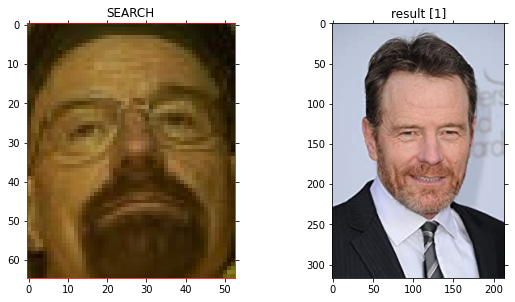

[9611]
https://m.media-amazon.com/images/M/MV5BMTY1OTY5NjI5NV5BMl5BanBnXkFtZTcwODA4MjM0OA@@._V1_UX214_CR0,0,214,317_AL_.jpg


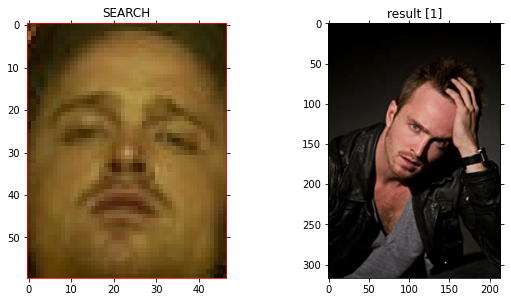

In [16]:
url = 'https://media.wired.com/photos/5932cca895879f6d0c009fd2/191:100/w_1280,c_limit/breaking_bad.jpg'
img = url_to_image(url)
faces = model.get(img)
for idx, face in enumerate(faces):
    k = 1
    bboxes = face.bbox.astype(np.int)
    face_to_search = img[int(bboxes[1]):int(bboxes[3]), int(bboxes[0]):int(bboxes[2])]
    if face_to_search.size != 0:
        search(face.embedding, k, face_to_search)

In [129]:
from scipy.spatial import distance
distncs = distance.cdist(np.expand_dims(face.embedding, axis=0), np.array(list_items), 'euclidean')

In [99]:
np.array(list(d.values())).shape

(23903, 1, 512)

In [130]:
np.argsort(distncs)[:5]

array([[    0,  4543, 19672, ...,  8174, 19795,  8144]])

In [122]:
distncs

array([[ 0.        , 34.68160161, 35.00056693, ..., 33.89484199,
        33.65183274, 34.93646542]])